**Steps to approach this project:-**
1. Understand the process and read each and every comment for better understanding.
2. Follow along the comment, if having problem in understanding any step, ask the mentor, also google first to exercise the brain.
3. We have given steps to deal with train and validation images, and test part is for your experimentation.
4. Spend some days on this project and google each term you encounter so that it sinks into your brain.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image

img = Image.open("/content/drive/MyDrive/cat and dog image data set/cat_dog/test/cats/cat.1500.jpg")
width, height = img.size
print("Width:", width)
print("Height:", height)

Width: 490
Height: 500


In [ ]:
import cv2

img = cv2.imread("/content/drive/MyDrive/cat and dog image data set/cat_dog/test/cats/cat.1500.jpg")
height, width, channels = img.shape
print("Width:", width)
print("Height:", height)
print("Channels:", channels)

Width: 490
Height: 500
Channels: 3


Resizing images to a common size is often necessary for training neural networks, as it simplifies the model pipeline, reduces computational costs, and helps ensure consistent performance across different inputs.

In [ ]:
# Importing necessary library os for directory and shutil to copy files from one directory to the other
import os, shutil

# copy the path of main data and define a variable named original_dataset_dir
original_dataset_dir = "/content/drive/MyDrive/cat and dog image data set/main_data"

# now we will create another directory named cat_dog parallel to main data, where you will create train,
#validation and test directory to store equal amount of images of dog and cat by copying it from main data directory
# first define the path which is parallel to main data path

base_dir = "/content/drive/MyDrive/cat and dog image data set"

In [ ]:
# Create a new directory named 'cat_dog' parallel to the main data directory
new_dir = os.path.join(base_dir, "cat_dog")
os.makedirs(new_dir, exist_ok=True)

In [ ]:
# Now connect base_dir to train, validation and test directories using --> os.path.join(pass base dir here, directory name you want to create)
# Use os.mkdir and create train_dir, validation_dir, test_dir
train_dir = os.path.join(new_dir, "train")
os.makedirs(train_dir, exist_ok=True)

validation_dir = os.path.join(new_dir, "validation")
os.makedirs(validation_dir, exist_ok=True)

test_dir = os.path.join(new_dir, "test")
os.makedirs(test_dir, exist_ok=True)

In [ ]:
# Count the number of cat and dog images in the original dataset
num_cat_images = sum(1 for file in os.listdir(original_dataset_dir) if file.startswith("cat"))
num_dog_images = sum(1 for file in os.listdir(original_dataset_dir) if file.startswith("dog"))
total_images = min(num_cat_images, num_dog_images)  # Ensure equal numbers of cat and dog images
print(num_cat_images)
print(total_images)

2000
2000


In [ ]:
# Set up directories for training, validation, and testing for cats and dogs
train_cats_dir = os.path.join(train_dir, "cats")
os.makedirs(train_cats_dir, exist_ok=True)
train_dogs_dir = os.path.join(train_dir, "dogs")
os.makedirs(train_dogs_dir, exist_ok=True)

val_cats_dir = os.path.join(validation_dir, "cats")
os.makedirs(val_cats_dir, exist_ok=True)
val_dogs_dir = os.path.join(validation_dir, "dogs")
os.makedirs(val_dogs_dir, exist_ok=True)

test_cats_dir = os.path.join(test_dir, "cats")
os.makedirs(test_cats_dir, exist_ok=True)
test_dogs_dir = os.path.join(test_dir, "dogs")
os.makedirs(test_dogs_dir, exist_ok=True)

**Now we want to copy files from original directory to the base_dir. We will copy 1000 dog and cat images to the dog and cat folder in train directory.**

In [ ]:
# making a list of image captions of cat using list comprehension(here we are copying first 1000 images of cat)
cnames = [f"cat.{i}.jpg" for i in range(1000)]

# loop over caption names in cnames and define a variable src by connecting original directory with the caption,
# and then copy image from src to dest,  where dest variable is created by connecting train_cats_dir with the caption.
for cname in cnames:
    src = os.path.join(original_dataset_dir, cname)
    dest = os.path.join(train_cats_dir, cname)
    shutil.copyfile(src, dest)

In [ ]:
cnames = [f"cat.{i}.jpg" for i in range(1000, 1500)]

for cname in cnames:
    src = os.path.join(original_dataset_dir, cname)
    dest = os.path.join(val_cats_dir, cname)
    shutil.copyfile(src, dest)


In [ ]:
# follow previous procedure as it is, just change only range(1000) --> range(1500, 2000)
# also this time we are copying files to test_cats_dir, so change dest location to val_cats_dir.

cnames = [f"cat.{i}.jpg" for i in range(1500, 2000)]

for cname in cnames:
    src = os.path.join(original_dataset_dir, cname)
    dest = os.path.join(test_cats_dir, cname)
    shutil.copyfile(src, dest)


In [ ]:
# making a list of image captions of dog using list comprehension(here we are copying first 1000 images of dog)

dnames = [f"dog.{i}.jpg" for i in range(1000)]

for dname in dnames:
    src = os.path.join(original_dataset_dir, dname)
    dest = os.path.join(train_dogs_dir, dname)
    shutil.copyfile(src, dest)


In [ ]:
# follow previous procedure as it is, just change only range(1000) --> range(1000, 1500)
# also this time we are copying files to val_dogs_dir, so change dest location to val_dogs_dir.
dnames = [f"dog.{i}.jpg" for i in range(1000, 1500)]

for dname in dnames:
    src = os.path.join(original_dataset_dir, dname)
    dest = os.path.join(val_dogs_dir, dname)
    shutil.copyfile(src, dest)


In [ ]:
# follow previous procedure as it is, just change only range(1000) --> range(1500, 2000)
# also this time we are copying files to test_dogs_dir, so change dest location to test_dogs_dir.
dnames = [f"dog.{i}.jpg" for i in range(1500, 2000)]

for dname in dnames:
    src = os.path.join(original_dataset_dir, dname)
    dest = os.path.join(test_dogs_dir, dname)
    shutil.copyfile(src, dest)


In [ ]:
# Now we will print length of cat and dog directories of train, validation and test directory from base_dir
# Define the paths to the cat and dog directories in train, validation, and test directories
train_cat_dir = os.path.join(train_dir, 'cats')
train_dog_dir = os.path.join(train_dir, 'dogs')

val_cat_dir = os.path.join(validation_dir, 'cats')
val_dog_dir = os.path.join(validation_dir, 'dogs')

test_cat_dir = os.path.join(test_dir, 'cats')
test_dog_dir = os.path.join(test_dir, 'dogs')

# Function to count the number of files in a directory
def count_files(directory):
    return len(os.listdir(directory))

# Print the lengths of cat and dog directories
print("Train Cat Images:", count_files(train_cat_dir))
print("Train Dog Images:", count_files(train_dog_dir))

print("Validation Cat Images:", count_files(val_cat_dir))
print("Validation Dog Images:", count_files(val_dog_dir))

print("Test Cat Images:", count_files(test_cat_dir))
print("Test Dog Images:", count_files(test_dog_dir))



Train Cat Images: 1000
Train Dog Images: 1000
Validation Cat Images: 500
Validation Dog Images: 500
Test Cat Images: 500
Test Dog Images: 500


### **Using an input width of 490 pixels should be fine as long as you maintain consistency across your dataset and consider the factors mentioned above. If you encounter any issues during training or inference, you can experiment with different input sizes and preprocessing techniques to optimize your model's performance**

**If you have done data augmentation once, your output may be different than what's given above. **

In [ ]:
# Importing tensorflow and keras libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

# defining the model and setup 3 convolutional layers, 3 maxpooling layers and then 2 dense layers in the end.
# setup will be like this
# conv2d-> maxpool2d, conv2d->maxpool2d, conv2d->maxpool2d, flatten layer, dense layer, dense layer

model = models.Sequential()

# Add the first convolutional layer followed by a max pooling layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
#model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(500,490, 3))) later we resize to 150,150
model.add(layers.MaxPooling2D((2, 2)))

# Add the second convolutional layer followed by a max pooling layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Add the third convolutional layer followed by a max pooling layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer to convert 2D features into a vector
model.add(layers.Flatten())

# Add a dense layer with 512 units
model.add(layers.Dense(512, activation='relu'))

# Add the output layer with 1 unit (for binary classification) and sigmoid activation
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

**The number of filters in each convolutional layer (32, 64, 128, etc.) determines the depth or complexity of the features extracted by the layer. The choice of the number of filters can vary based on the complexity of the problem and the available computational resources.**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for training data
train_datagen = ImageDataGenerator(rescale=1./255)

# Define the ImageDataGenerator for test data (only rescaling, no other augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

This sets up two ImageDataGenerator objects, train_datagen and test_datagen, with the rescale parameter set to 1./255, which means it will rescale the pixel values of the images to be in the range [0,1]. This normalization step is common practice in neural network training to make the optimization process more stable.

In [ ]:
# uncomment it to see what it explain about the method
?train_datagen.flow_from_directory

In [ ]:
# create generators of train and validation using train_datagen.flow_from_directory
# Define the batch size
train_dir= '/content/drive/MyDrive/cat and dog image data set/cat_dog/train'
validation_dir= '/content/drive/MyDrive/cat and dog image data set/cat_dog/validation'
# Create generators for training and validation data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Load one batch of images
images = train_generator.next()

# Print the shape of the loaded image
print("Shape of the loaded image:", images[0].shape)

Shape of the loaded image: (16, 150, 150, 3)


### we have a batch of 32 images, each with a size of 150x150 pixels, and each image has 3 color channels (RGB).

In [ ]:
# Calculate the total number of samples
total_samples = len(train_generator.filenames)

# Calculate the number of batches
num_batches = total_samples // train_generator.batch_size

# If there are any remaining samples that don't fit into a full batch, increment the number of batches by 1
if total_samples % train_generator.batch_size != 0:
    num_batches += 1

print("Total number of samples:", total_samples)
print("Batch size:", train_generator.batch_size)
print("Number of batches:", num_batches)

Total number of samples: 2000
Batch size: 16
Number of batches: 125


"Found 2000 images": This means that the data generator found a total of 2000 images in the specified directory (or directories if using subdirectories for each class).
"belonging to 2 classes": This means that the images were grouped into 2 classes. In a binary classification problem like the one you're dealing with (cats vs. dogs), there are 2 classes: one for cats and one for dogs.
These messages are informational and let you know how many images and classes the data generator found in the specified directories. It's a useful confirmation that the data generator is set up correctly and has found the expected data.

When dealing with datasets that don't evenly divide into batches, it's common practice to include a partial batch for the last iteration. In your case, you have 2000 samples and a batch size of 32, so the number of batches would indeed be 62 according to the calculation (2000/32 = 62.5).

However, as you correctly pointed out, there would be a remaining partial batch for the last iteration. TensorFlow's flow_from_directory function automatically handles this by including any remaining samples in the last batch. Therefore, the 63rd batch will contain the remaining samples, which could be less than the full batch size of 32 if the total number of samples isn't evenly divisible by the batch size.

we will convert only training and validation images we keep same size for test images


In [ ]:
from PIL import Image

img = Image.open("/content/drive/MyDrive/cat and dog image data set/cat_dog/test/cats/cat.1500.jpg")
width, height = img.size
print("Width:", width)
print("Height:", height)

Width: 490
Height: 500


This means that all images will be resized to have a height of 150 pixels and a width of 150 pixels. Resizing images to a consistent size is a common preprocessing step in machine learning tasks, especially when working with convolutional neural networks (CNNs), as it ensures that all input images have the same dimensions, which is necessary for feeding them into the network.








In [ ]:
# let's loop over train generator to see what does it show
for data_batch, label_batch in train_generator:
    print("Data batch shape:", data_batch.shape)
    print("Label batch shape:", label_batch.shape)
    print("Labels in the batch:", label_batch)
    break  # Break the loop after processing the first batch


Data batch shape: (16, 150, 150, 3)
Label batch shape: (16,)
Labels in the batch: [1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0.]



The generator doesn't save anything to disk. Instead, it loads and preprocesses images on-the-fly during training. It generates batches of images and their corresponding labels directly from the directory structure provided.

Regarding shuffling, by default, the flow_from_directory method shuffles the images within each class directory but does not shuffle the order of classes. This means that the generator will load batches of images from the directory, but the order of the images within each batch will be randomized. This is beneficial during training to prevent the model from memorizing the order of the images and overfitting to the training data.

If you want to disable shuffling, you can set the shuffle parameter to False when creating the generator:

In [ ]:
# Calculate the total number of samples in the training and validation datasets
total_train_samples = len(train_generator.filenames)
total_validation_samples = len(validation_generator.filenames)

# Define the desired batch size
desired_batch_size = 32  # You can adjust this based on your system's memory and performance

# Calculate the desired number of steps per epoch and validation steps
desired_steps_per_epoch = total_train_samples // desired_batch_size
desired_validation_steps = total_validation_samples // desired_batch_size

# If there are any remaining samples that don't fit into a full batch, increment the number of steps by 1
if total_train_samples % desired_batch_size != 0:
    desired_steps_per_epoch += 1

if total_validation_samples % desired_batch_size != 0:
    desired_validation_steps += 1

print("Desired Steps per Epoch:", desired_steps_per_epoch)
print("Desired Validation Steps:", desired_validation_steps)

Desired Steps per Epoch: 63
Desired Validation Steps: 32


Sure, batch size selection depends on various factors such as the complexity of the model, available computational resources, and the size of the dataset. Here are some suggestions for batch sizes smaller than 32:

1. **8 or 16**: These batch sizes are commonly used, especially for smaller datasets or when training on limited computational resources.( not for this data set as its reaching accuracy one with 1 or 2 ephoches )

2. **4**: This is a very small batch size that can be useful for models with small memory footprints or when training on large datasets with limited memory.

3. **2**: For very memory-constrained environments or when dealing with extremely large models, a batch size of 2 can be used, although training might be slower due to more frequent parameter updates.

4. **1 (Stochastic Gradient Descent)**: In some cases, especially in online learning scenarios or when training on extremely large datasets, a batch size of 1 (stochastic gradient descent) can be used. However, this approach leads to very noisy gradient updates and might require careful tuning of learning rates and other hyperparameters.

Ultimately, it's essential to experiment with different batch sizes and monitor the training process to find the optimal balance between training speed, memory usage, and model performance for your specific task and resources.

In [ ]:
# fitting the model by passing train_generator as first arguement with necessary parameters like steps_per_epoch=100, for 10 epochs
# also pass validation data and validation steps=50
# Define the number of steps per epoch and validation steps
steps_per_epoch = 63
validation_steps = 32
#steps per epch refers to number of batches processed in one
# Fit the model using the train_generator and validation data
history = model.fit(
    train_generator,
    steps_per_epoch=desired_steps_per_epoch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=desired_validation_steps
)


Epoch 1/10
63/63 [==============================] - 219s 3s/step - loss: 0.7305 - accuracy: 0.5179 - val_loss: 0.6909 - val_accuracy: 0.5176
Epoch 2/10
63/63 [==============================] - 122s 2s/step - loss: 0.6925 - accuracy: 0.5139 - val_loss: 0.6891 - val_accuracy: 0.5000
Epoch 3/10
63/63 [==============================] - 108s 2s/step - loss: 0.6851 - accuracy: 0.5605 - val_loss: 0.6848 - val_accuracy: 0.5898
Epoch 4/10
63/63 [==============================] - 99s 2s/step - loss: 0.6596 - accuracy: 0.6071 - val_loss: 0.6383 - val_accuracy: 0.6602
Epoch 5/10
63/63 [==============================] - 89s 1s/step - loss: 0.6207 - accuracy: 0.6796 - val_loss: 0.6298 - val_accuracy: 0.6328
Epoch 6/10
63/63 [==============================] - 78s 1s/step - loss: 0.5713 - accuracy: 0.7004 - val_loss: 0.7071 - val_accuracy: 0.5742
Epoch 7/10
63/63 [==============================] - 80s 1s/step - loss: 0.5507 - accuracy: 0.7421 - val_loss: 0.6925 - val_accuracy: 0.6055
Epoch 8/10
63/63 

In [ ]:
# save the model for futher use using model.save
# Save the trained model in the original directory
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# print the accuracy using history.history['acc']
# Print the training accuracy
acc = history.history['accuracy']
print("Training Accuracy:", acc)

Training Accuracy: [0.5178571343421936, 0.5138888955116272, 0.5605158805847168, 0.6071428656578064, 0.6795634627342224, 0.7003968358039856, 0.7420634627342224, 0.7609127163887024, 0.7996031641960144, 0.8521825671195984]


In [ ]:
# print validation accuracy using same as previous step
# Print the validation accuracy
val_acc = history.history['val_accuracy']
print("Validation Accuracy:", val_acc)

Validation Accuracy: [0.517578125, 0.5, 0.58984375, 0.66015625, 0.6328125, 0.57421875, 0.60546875, 0.66796875, 0.619140625, 0.658203125]


In [ ]:
# print loss using same as previous steps
# Print the loss
loss = history.history['loss']
print("Loss:", loss)

Loss: [0.7305188775062561, 0.6924561858177185, 0.685104250907898, 0.659561276435852, 0.6206651329994202, 0.5712721943855286, 0.550669252872467, 0.4767671525478363, 0.42179757356643677, 0.3337985575199127]


In [ ]:
# print val_loss using same as previous steps
# Print the validation loss
val_loss = history.history['val_loss']
print("Validation Loss:", val_loss)

Validation Loss: [0.6909466981887817, 0.6890643835067749, 0.6848399639129639, 0.6383087635040283, 0.629764974117279, 0.7070692181587219, 0.6924564242362976, 0.6533924341201782, 0.691917359828949, 1.0179756879806519]


**Plotting accuracies and loss**

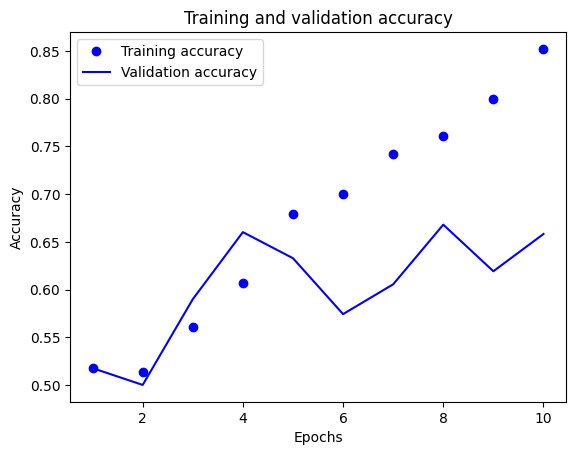

In [ ]:
# import pyplot from matplotlib
import matplotlib.pyplot as plt

# Define the number of epochs
epochs = range(1, len(acc) + 1)

# Plot epoch vs. accuracies of train and validation
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show plot
plt.show()


b' stands for blue color line.
'bo' stands for blue color circles (markers).

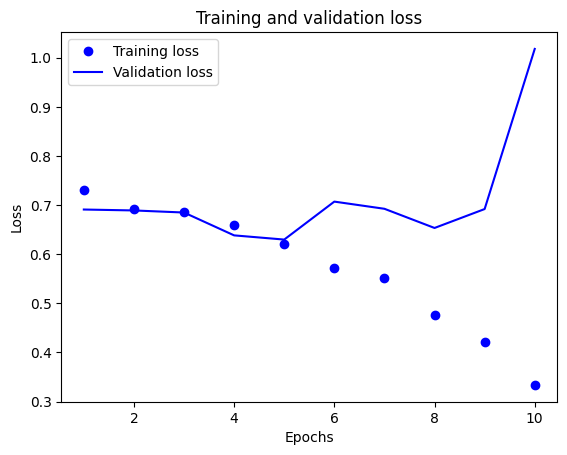

In [ ]:
# # define no of epochs and then plot epoch vs loss of train and validation
# Define the number of epochs
epochs = range(1, len(loss) + 1)

# Plot epoch vs. loss of train and validation
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show plot
plt.show()


# Data augmentation

In [ ]:
# setting up data augmentation config using ImageDataGenerator using these parameters
# rotation_range=40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2,
# zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest'


from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation configuration
datagen = ImageDataGenerator(
    rotation_range=40,            # Degree range for random rotations
    width_shift_range=0.2,        # Fraction of total width for horizontal shifting
    height_shift_range=0.2,       # Fraction of total height for vertical shifting
    shear_range=0.2,              # Shear angle in counter-clockwise direction
    zoom_range=0.2,               # Range for random zoom
    horizontal_flip=True,         # Randomly flip inputs horizontally
    fill_mode='nearest'           # Strategy used for filling in newly created pixels
)


Rotation: Each image can be rotated up to 40 degrees in a random direction.

Width Shift: Each image can be horizontally shifted by up to 20% of its total width.

Height Shift: Each image can be vertically shifted by up to 20% of its total height.

Shear: Each image can be sheared by a random angle in the counter-clockwise direction.

Zoom: Each image can be zoomed in or out by a factor of up to 20%.

Horizontal Flip: Each image can be horizontally flipped with a 50% probability.

Fill Mode: This specifies how newly created pixels will be filled. In this case, the 'nearest' mode is used, which means that the value of the nearest pixel will be used to fill the newly created pixels.

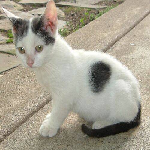

In [ ]:
# displaying some augmented images using image from keras.preprocessing
from keras.preprocessing import image

# Define the path to the image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]

# Load the image with target size (150, 150)
img = image.load_img(img_path, target_size=(150, 150))
img


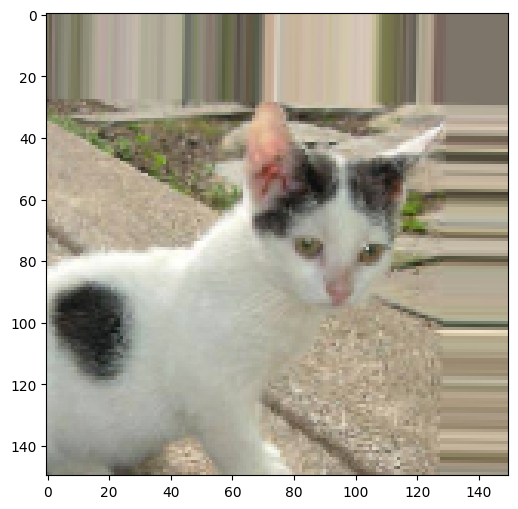

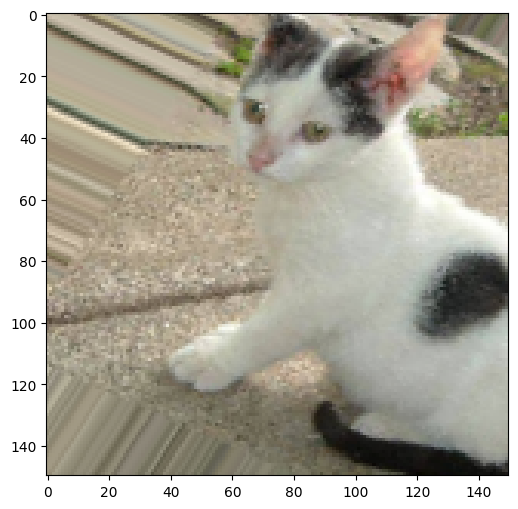

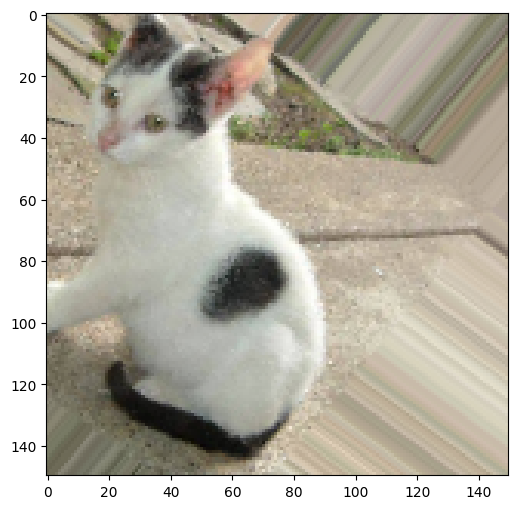

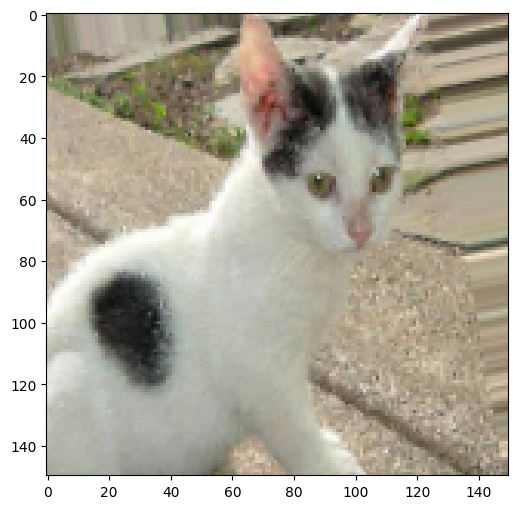

In [ ]:
# Convert image into array
x = image.img_to_array(img)  # Gives (150,150,3) array
x = x.reshape((1,) + x.shape)  # Reshapes to (1,150,150,3) array

# Generate augmented images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i, figsize=(6, 6))  # Adjust figure size here (width, height)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()


In [ ]:
# new model creation like we did before(You can change no of neurons according to your intution for experiment)
from tensorflow.keras import models, layers, optimizers

# Define the new model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])


In [ ]:
# training with augmented data, use ImageDataGenerator and pass rescale=1./255 and keep rest parameters same like we did before
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define the validation data generator
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# defining train_generator and validation_generator again
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                   target_size = (150, 150),
                                   batch_size = 32,
                                   class_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# fitting the model, you can change epoch from 5 to 10 or 20 for experimentation purposes

# Define the number of epochs
epochs = 5  # You can adjust this for experimentation purposes
#Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators
# Fit the model using the data generators
history = model.fit(
    train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary'
    ),
    steps_per_epoch=100,  # Adjust this based on your dataset size
    epochs=epochs,
    validation_data=test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary'
    ),
    validation_steps=50  # Adjust this based on your dataset size
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/5
100/100 [==============================] - 148s 1s/step - loss: 0.6458 - accuracy: 0.6175 - val_loss: 0.6484 - val_accuracy: 0.6010
Epoch 2/5
100/100 [==============================] - 140s 1s/step - loss: 0.6289 - accuracy: 0.6310 - val_loss: 0.6252 - val_accuracy: 0.6380
Epoch 3/5
100/100 [==============================] - 135s 1s/step - loss: 0.6273 - accuracy: 0.6425 - val_loss: 0.6149 - val_accuracy: 0.6600
Epoch 4/5
100/100 [==============================] - 134s 1s/step - loss: 0.6136 - accuracy: 0.6630 - val_loss: 0.5948 - val_accuracy: 0.6700
Epoch 5/5
100/100 [==============================] - 139s 1s/step - loss: 0.5995 - accuracy: 0.6820 - val_loss: 0.6115 - val_accuracy: 0.6630


In [ ]:
# You can save model again for reuse
model.save('cats_and_dogs_small_model2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# define acc, train_loss, val_acc, val_loss again from history.history method
# Extract accuracy, training loss, validation accuracy, and validation loss from history
acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

In [ ]:
print("Accuracy:", acc)
print("Training Loss:", train_loss)
print("Validation Accuracy:", val_acc)
print("Validation Loss:", val_loss)

Accuracy: [0.6175000071525574, 0.6309999823570251, 0.6424999833106995, 0.6629999876022339, 0.6819999814033508]
Training Loss: [0.6457616686820984, 0.6288907527923584, 0.6272730827331543, 0.613574206829071, 0.5994616150856018]
Validation Accuracy: [0.6010000109672546, 0.6380000114440918, 0.6600000262260437, 0.6700000166893005, 0.6629999876022339]
Validation Loss: [0.6484322547912598, 0.6252260804176331, 0.6149210333824158, 0.594809889793396, 0.6115429401397705]


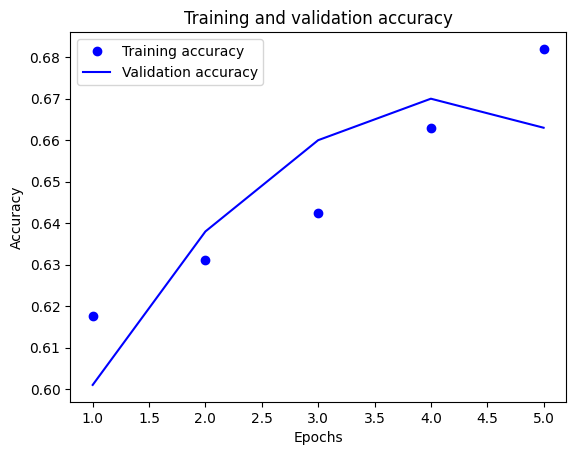

In [ ]:
# define epochs again and plot epochs vs accuracy for both train and validation
import matplotlib.pyplot as plt

# Define the number of epochs
epochs = range(1, len(acc) + 1)

# Plot epochs versus accuracy for both training and validation
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show plot
plt.show()

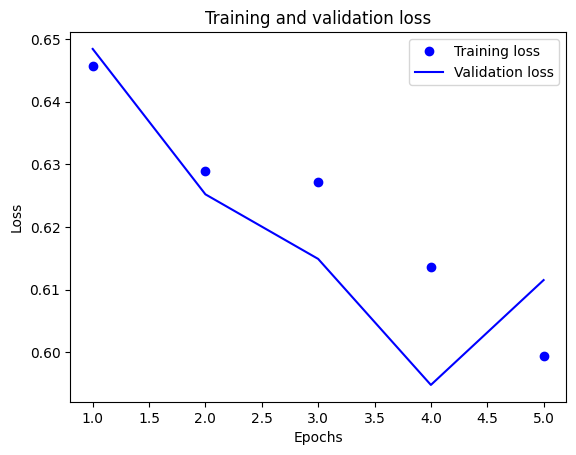

In [ ]:
# define epochs again and plot epochs vs loss for both train and validation
# Define the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot epochs versus loss for both training and validation
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show plot
plt.show()

**Feature extraction using pretrained VGG16**

In [ ]:
# Using pretrained network ImageNet (Method = Feature extraction)
#import VGG16 from tensorflow
from tensorflow.keras.applications import VGG16

# instantantiating VGG16 and pass include_top = False, weights='imagenet' and input shape = (150,150,3)

# Instantiate VGG16 with specific parameters
conv_base = VGG16(weights='imagenet',        # Use weights pre-trained on ImageNet
                  include_top=False,         # Exclude the densely connected layers at the top
                  input_shape=(150, 150, 3)) # Input shape of the images



In [ ]:
# Print the summary of the VGG16 convolutional base
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for rescaling pixel values
datagen = ImageDataGenerator(rescale=1./255)

# Define the batch size
batch_size = 25

# Define a function for feature extraction without data augmentation
def feature_extraction(directory, sample):
    # Define arrays to store features and labels
    features = np.zeros(shape=(sample, 4, 4, 512))
    labels = np.zeros(shape=(sample,))

    # Create a data generator for the specified directory
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary'
    )

    count = 0
    # Iterate over batches of images and labels
    for image_batch, labels_batch in generator:
        # Predict features using the pretrained VGG16 model (conv_base)
        batch_features = conv_base.predict(image_batch)

        # Store the extracted features and labels
        features[count * batch_size : (count + 1) * batch_size] = batch_features
        labels[count * batch_size : (count + 1) * batch_size] = labels_batch

        count += 1
        # Break out of the loop if the desired number of samples is reached
        if count * batch_size >= sample:
            break

    return features, labels


In [ ]:
# Now extract features for train, validation, test
# Define sample sizes for each dataset
train_size = 2000
validation_size = 1000
test_size = 1000

# Extract features for the training dataset
train_features, train_labels = feature_extraction(train_dir, sample=train_size)

# Extract features for the validation dataset
validation_features, validation_labels = feature_extraction(validation_dir, sample=validation_size)

# Extract features for the test dataset
test_features, test_labels = feature_extraction(test_dir, sample=test_size)



Found 2000 images belonging to 2 classes.
1/1 [==============================] - 6s 6s/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 6s 6s/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 6s 6s/step


In [ ]:
# reshape, train, validation, test into (no of samples, 4*4*512) features before passing into dense layers
# Reshape the extracted features for training dataset
train_features = train_features.reshape(train_size, 4 * 4 * 512)

# Reshape the extracted features for validation dataset
validation_features = validation_features.reshape(validation_size, 4 * 4 * 512)

# Reshape the extracted features for test dataset
test_features = test_features.reshape(test_size, 4 * 4 * 512)


In [ ]:
# define a new model and  add dense classfier first then dropout(0.5) and then final dense layer with activation sigmoid

from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))  # Dense classifier
model.add(layers.Dropout(0.5))  # Dropout layer with dropout rate 0.5
model.add(layers.Dense(1, activation='sigmoid'))  # Final dense layer with sigmoid activation

# Compile the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])


In [ ]:
# Fit the model with 10 epochs and batch size 20
vgg_history = model.fit(train_features, train_labels,
                        epochs=10,
                        batch_size=20,
                        validation_data=(validation_features, validation_labels))


Epoch 1/10
100/100 [==============================] - 4s 32ms/step - loss: 0.7606 - acc: 0.7515 - val_loss: 0.2658 - val_acc: 0.8900
Epoch 2/10
100/100 [==============================] - 2s 21ms/step - loss: 0.3770 - acc: 0.8430 - val_loss: 0.5286 - val_acc: 0.7570
Epoch 3/10
100/100 [==============================] - 2s 22ms/step - loss: 0.2787 - acc: 0.8805 - val_loss: 0.2704 - val_acc: 0.8900
Epoch 4/10
100/100 [==============================] - 2s 22ms/step - loss: 0.2466 - acc: 0.8965 - val_loss: 0.6321 - val_acc: 0.7820
Epoch 5/10
100/100 [==============================] - 2s 21ms/step - loss: 0.2178 - acc: 0.9160 - val_loss: 0.2422 - val_acc: 0.9050
Epoch 6/10
100/100 [==============================] - 2s 25ms/step - loss: 0.1926 - acc: 0.9250 - val_loss: 0.2527 - val_acc: 0.9070
Epoch 7/10
100/100 [==============================] - 3s 34ms/step - loss: 0.1469 - acc: 0.9395 - val_loss: 0.3534 - val_acc: 0.8810
Epoch 8/10
100/100 [==============================] - 2s 22ms/step - 

Accuracy: [0.7515000104904175, 0.8429999947547913, 0.8805000185966492, 0.8964999914169312, 0.9160000085830688, 0.925000011920929, 0.9394999742507935, 0.9459999799728394, 0.9430000185966492, 0.9505000114440918]
Training Loss: [0.6457616686820984, 0.6288907527923584, 0.6272730827331543, 0.613574206829071, 0.5994616150856018]
Validation Accuracy: [0.8899999856948853, 0.7570000290870667, 0.8899999856948853, 0.7820000052452087, 0.9049999713897705, 0.9070000052452087, 0.8809999823570251, 0.8980000019073486, 0.9020000100135803, 0.9039999842643738]
Validation Loss: [0.26578235626220703, 0.5285606980323792, 0.27035874128341675, 0.6320534944534302, 0.24218802154064178, 0.2526712417602539, 0.35344192385673523, 0.2921534776687622, 0.28428810834884644, 0.2821574807167053]


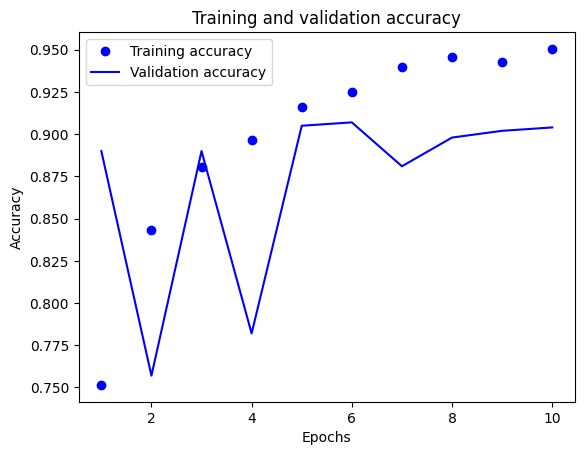

In [ ]:
# define acc, loss, val_acc, val_loss again from history.history method

# Define accuracy, loss, validation accuracy, and validation loss from history.history
acc = vgg_history.history['acc']
val_acc = vgg_history.history['val_acc']
loss = vgg_history.history['loss']
val_loss = vgg_history.history['val_loss']

print("Accuracy:", acc)
print("Training Loss:", train_loss)
print("Validation Accuracy:", val_acc)
print("Validation Loss:", val_loss)

# Plot epochs versus train accuracy and validation accuracy
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


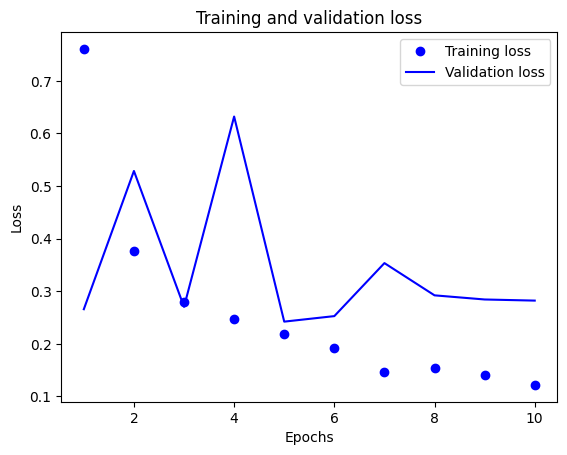

In [ ]:
# plot epochs vs train loss and validation loss
# Plot epochs versus train loss and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Define the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_generator, steps=50)

# Print the test accuracy
print('Test accuracy:', test_acc)



![finish](https://static8.depositphotos.com/1472772/978/i/950/depositphotos_9787455-stock-photo-finish-flags.jpg)